In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
data=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [53]:
data.head() # Checking the top 5 rows


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [54]:
data.tail()  #Checking the bottom 5 rows


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2223,363614,"Comcast, Ypsilanti MI Internet Speed",24-06-15,24-Jun-15,10:28:33 PM,Customer Care Call,Ypsilanti,Michigan,48198,Open,Yes


In [55]:
data.drop(["Date"],axis=1,inplace=True) #removing duplicate data
data.head()  # Checking if duplicate column is removed

,Ticket #,Customer Complaint,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [57]:
data.info()  #Checking for null values : None Found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date_month_year              2224 non-null   object
 3   Time                         2224 non-null   object
 4   Received Via                 2224 non-null   object
 5   City                         2224 non-null   object
 6   State                        2224 non-null   object
 7   Zip code                     2224 non-null   int64 
 8   Status                       2224 non-null   object
 9   Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(9)
memory usage: 173.9+ KB


In [59]:
data.dtypes # Note that date and time are shown as object data type but in actual these must be datetime datatype

Ticket #                       object
Customer Complaint             object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [61]:
data.describe()  # Zip code statistical data is useless since its a count and not a value 

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


**Converting Date and Date_month_year to datetime data types**

In [63]:
data['Date_month_year']=pd.to_datetime(data['Date_month_year'])


In [65]:
data.dtypes  # converted the required Date_month_year column to datetime data type

Ticket #                               object
Customer Complaint                     object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

**Creating column for month and Days**

In [66]:
data['Month']=pd.to_datetime(data['Date_month_year'],format='%d-%m-%y').dt.month
data['Day']=pd.to_datetime(data['Date_month_year'],format='%A,%B %d')
data['Day']

0      2015-04-22
1      2015-08-04
2      2015-04-18
3      2015-07-05
4      2015-05-26
          ...    
2219   2015-02-04
2220   2015-02-06
2221   2015-09-06
2222   2015-06-23
2223   2015-06-24
Name: Day, Length: 2224, dtype: datetime64[ns]

*Plotting Month wise trend of complaints*

Text(0, 0.5, 'Number of complaints')

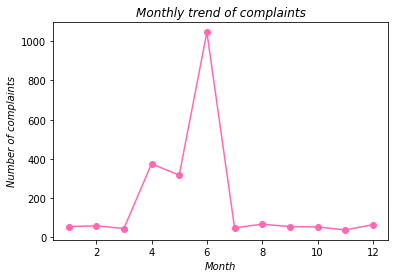

In [76]:
x=data.groupby('Month')['Customer Complaint'].count()
x.plot(c='hotpink',marker='o')
plt.title("Monthly trend of complaints",style='italic')
plt.xlabel("Month",style='italic')
plt.ylabel("Number of complaints",style='italic')

In [77]:
  print("Highest number of complains are recorded in month :",x.idxmax(),"and total number of complains are ",x.max())

Highest number of complains are recorded in month : 6 and total number of complains are  1046


*Plotting day wise trend of complaints*

In [78]:
day_wise=data.groupby('Day')['Customer Complaint'].count()
day_wise.sort_index()

Day
2015-01-04    18
2015-01-05    12
2015-01-06    25
2015-02-04    27
2015-02-05     7
              ..
2015-11-05    12
2015-11-06    21
2015-12-04    15
2015-12-05     7
2015-12-06    43
Name: Customer Complaint, Length: 91, dtype: int64

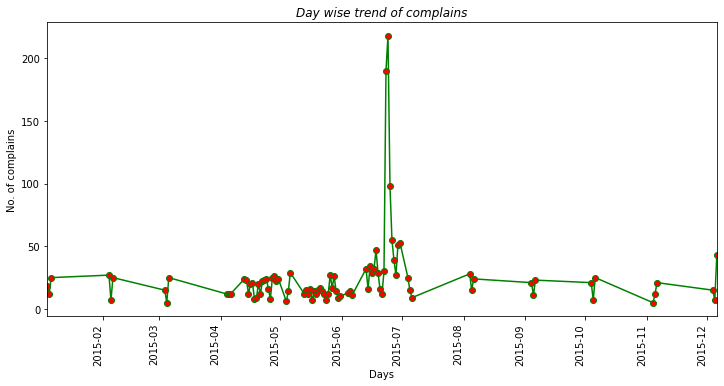

In [79]:
fig=plt.figure(figsize=(12,6))
day_wise.plot(marker='o',mfc='red',color='green')
plt.title("Day wise trend of complains",style='italic')
plt.xlabel("Days")
plt.ylabel("No. of complains")
plt.xlim('2015-01-04','2015-12-06')
plt.xticks(rotation='vertical')

plt.show()


In [80]:
print("Peak day for number of complaints is ",day_wise.idxmax(),"and number of complaints registered are",day_wise.max()) # The trend reports peak on june 24th,2015

Peak day for number of complaints is  2015-06-24 00:00:00 and number of complaints registered are 218


In [81]:
data.head()

,Ticket #,Customer Complaint,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day
0,250635,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,2015-04-22
1,223441,Payment disappear - service got disconnected,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,2015-08-04
2,242732,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,2015-04-18
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,2015-07-05
4,307175,Comcast not working and no service to boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,2015-05-26


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  # This is added back by InteractiveShellApp.init_path()


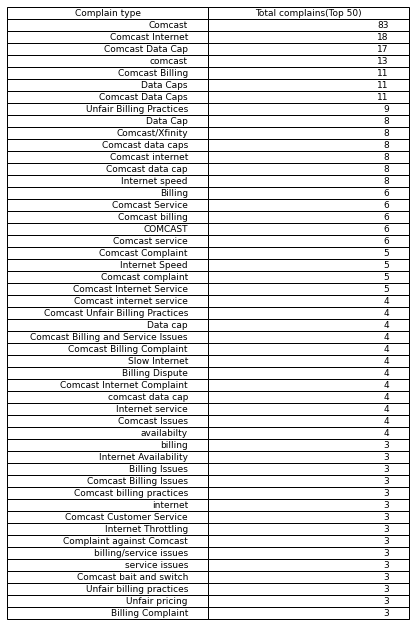

In [82]:
x2=data['Customer Complaint'].value_counts().sort_values(ascending=False).head(50)
y2=x2.index
dict={'Complain type':(y2),'Total complains(Top 50)':(x2)}
df=pd.DataFrame(dict)
fig,ax=plt.subplots()
ax.axis('off')
ax.axis('tight')
t= ax.table(cellText=df.values, colWidths = [0.6]*len(df.columns),  colLabels=df.columns,  loc='center')
t.auto_set_font_size(False) 
t.set_fontsize(9)
fig.tight_layout()
plt.show() 



In [83]:
table_X2=data['Customer Complaint'].value_counts().sort_values(ascending=False).head(50)
table_y=x2.index
y2

Index(['Comcast', 'Comcast Internet', 'Comcast Data Cap', 'comcast',
       'Comcast Billing', 'Data Caps', 'Comcast Data Caps',
       'Unfair Billing Practices', 'Data Cap', 'Comcast/Xfinity',
       'Comcast data caps', 'Comcast internet', 'Comcast data cap',
       'Internet speed', 'Billing', 'Comcast Service', 'Comcast billing',
       'COMCAST', 'Comcast service', 'Comcast Complaint', 'Internet Speed',
       'Comcast complaint', 'Comcast Internet Service',
       'Comcast internet service', 'Comcast Unfair Billing Practices',
       'Data cap', 'Comcast Billing and Service Issues',
       'Comcast Billing Complaint', 'Slow Internet', 'Billing Dispute',
       'Comcast Internet Complaint', 'comcast data cap', 'Internet service',
       'Comcast Issues', 'availabilty', 'billing', 'Internet Availability',
       'Billing Issues', 'Comcast Billing Issues', 'Comcast billing practices',
       'internet', 'Comcast Customer Service', 'Internet Throttling',
       'Complaint against Co

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


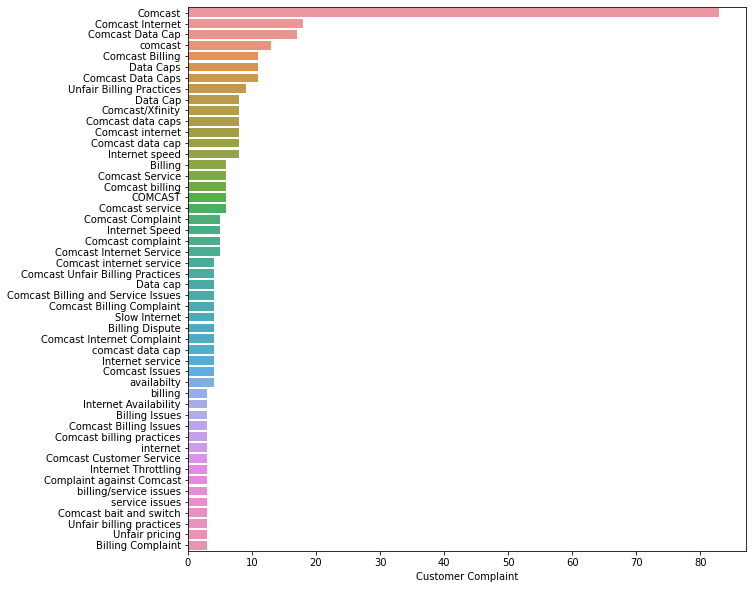

In [84]:
plt.figure(figsize=(10,10))
sns.barplot(x2,y2)
plt.show()

In [85]:
print("Highest number of complaint type are of :",x2.idxmax(),"and the number of complaints registered as",x2.idxmax(),"is :",x2.max())

Highest number of complaint type are of : Comcast and the number of complaints registered as Comcast is : 83


In [86]:
data['Final status']=data['Status']


In [87]:
for x in data['Status']:
   if x=='Solved':               
           data['Final status']=data['Final status'].replace('Solved','Closed')
   elif x=='Pending': 
           data['Final status']=data['Final status'].replace('Pending','Open')
   


In [88]:
data[['Final status']].head()

,Final status
0,Closed
1,Closed
2,Closed
3,Open
4,Closed


**Q.** **Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3**

In [89]:
new_data=data.groupby(['State','Final status']).size().unstack().reset_index()
new_data.fillna(0,inplace=True)
new_data.head()

Final status,State,Closed,Open
0,Alabama,17.0,9.0
1,Arizona,14.0,6.0
2,Arkansas,6.0,0.0
3,California,159.0,61.0
4,Colorado,58.0,22.0


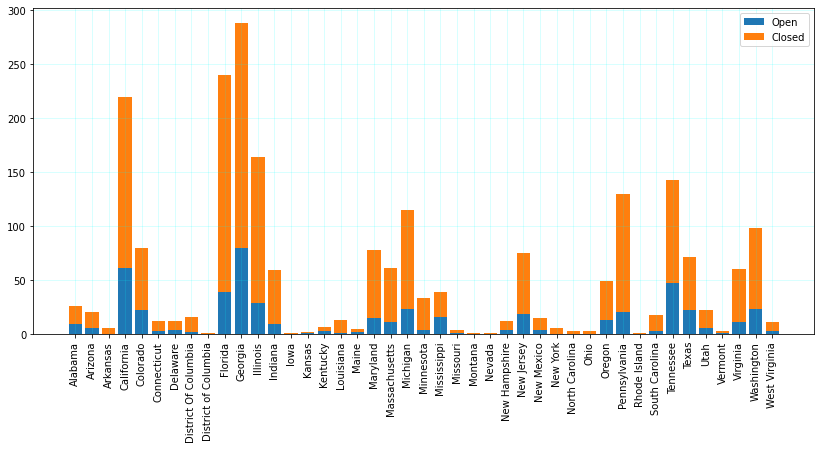

In [90]:
fig=plt.figure(figsize=(14,6))
plt.grid(alpha=0.3,linewidth=0.5,color='cyan')
plt.bar(new_data['State'],new_data['Open'],label="Open")
plt.bar(new_data['State'],new_data['Closed'],bottom=new_data['Open'],label="Closed")
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [91]:
z1=[]
z2=[]
z3=[]
for x in range(len(new_data['State'])):
  
  x1=(new_data['Open'][x]/(new_data['Closed'][x]+new_data['Open'][x]))*100
  
  z1.append(x1)
  
  x2=(new_data['Closed'][x]/(new_data['Closed'][x]+new_data['Open'][x]))*100
  
  z2.append(x2)
  x3=new_data['Open'][x]+new_data['Closed'][x]
  z3.append(x3)
  new_data['Unresolved %']=pd.Series(z1)
new_data['Resolved %']=pd.Series(z2)
new_data['Total Complaints']=pd.Series(z3)
  

In [92]:
new_data.head()

Final status,State,Closed,Open,Unresolved %,Resolved %,Total Complaints
0,Alabama,17.0,9.0,34.615385,65.384615,26.0
1,Arizona,14.0,6.0,30.000000,70.000000,20.0
2,Arkansas,6.0,0.0,0.000000,100.000000,6.0
3,California,159.0,61.0,27.727273,72.272727,220.0
4,Colorado,58.0,22.0,27.500000,72.500000,80.0


**Provide insights on:**
* Which state has the maximum complaints

In [93]:
print("From above chart it can be observed that the state with max complaints is :",new_data['State'][new_data['Total Complaints'].idxmax()],new_data['Total Complaints'].max())


From above chart it can be observed that the state with max complaints is : Georgia 288.0


* Which state has the highest percentage of unresolved complaints


In [94]:
"State having highest percentage of resolved complaints :",new_data['State'][new_data['Unresolved %'].idxmax()],new_data['Unresolved %'].max()

('State having highest percentage of resolved complaints :', 'Kansas', 50.0)

**Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.**

In [95]:
data.head()

,Ticket #,Customer Complaint,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day,Final status
0,250635,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,2015-04-22,Closed
1,223441,Payment disappear - service got disconnected,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,2015-08-04,Closed
2,242732,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,2015-04-18,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,2015-07-05,Open
4,307175,Comcast not working and no service to boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,2015-05-26,Closed


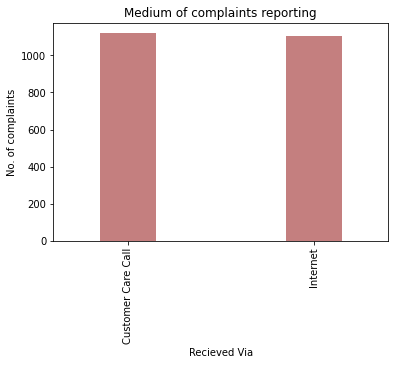

In [96]:
data['Received Via'].value_counts().plot.bar(color='darkred',width=0.3,xlabel='Recieved Via',ylabel='No. of complaints',title='Medium of complaints reporting',alpha=0.5)
plt.show()

In [97]:
new_data2=data.groupby(['Received Via','Final status']).size().unstack().reset_index()

In [98]:
z1=[]
z2=[]
z3=[]
for x in range(len(new_data2['Received Via'])):
         x1=(new_data2['Open'][x]/(new_data2['Closed'][x]+new_data2['Open'][x]))*100
  
         z1.append(x1)
  
         x2=(new_data2['Closed'][x]/(new_data2['Closed'][x]+new_data2['Open'][x]))*100
  
         z2.append(x2)
         x3=new_data2['Closed'][x]+new_data2['Open'][x]
         z3.append(x3)
         
new_data2['Unresolved %']=pd.Series(z1)
new_data2['Resolved %']=pd.Series(z2)
new_data2['Total Complaints']=pd.Series(z3)   
new_data2            

Final status,Received Via,Closed,Open,Unresolved %,Resolved %,Total Complaints
0,Customer Care Call,864,255,22.788204,77.211796,1119
1,Internet,843,262,23.710407,76.289593,1105


In [99]:
print("Percentage of complaints resolved till date, which were received through the Internet: ","%.2f"%new_data2['Resolved %'][1],"%") 
print("Percentage of complaints resolved till date, which were received through the customer care calls: ","%.2f"%new_data2['Resolved %'][0])

Percentage of complaints resolved till date, which were received through the Internet:  76.29 %
Percentage of complaints resolved till date, which were received through the customer care calls:  77.21
